In [3]:
import torch
import matplotlib.pyplot as plt
timesteps = torch.arange(0, 1000)
timesteps

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [20]:
from diffusers import DDPMScheduler
from train import compute_snr, get_training_noise_scheduler
def plot_snr_weight(gamma, v_pred):
    scheduler_config = {
              "_class_name": "DDIMScheduler",
              "_diffusers_version": "0.8.0",
              "beta_end": 0.012,
              "beta_schedule": "scaled_linear",
              "beta_start": 0.00085,
              "clip_sample": False,
              "num_train_timesteps": 1000,
              "prediction_type": "v_prediction",
              "set_alpha_to_one": False,
              "skip_prk_steps": True,
              "steps_offset": 1,
              "trained_betas": None
            }
    noise_scheduler = DDPMScheduler.from_config(scheduler_config)
    timesteps = torch.arange(0, 1000)
    snr = compute_snr(timesteps, noise_scheduler)
    min_snr_gamma = torch.minimum(snr, torch.full_like(snr, gamma))
    if v_pred:
        weights = min_snr_gamma / (snr + 1)
    else:
        weights =  min_snr_gamma / snr
    plt.plot(weights)

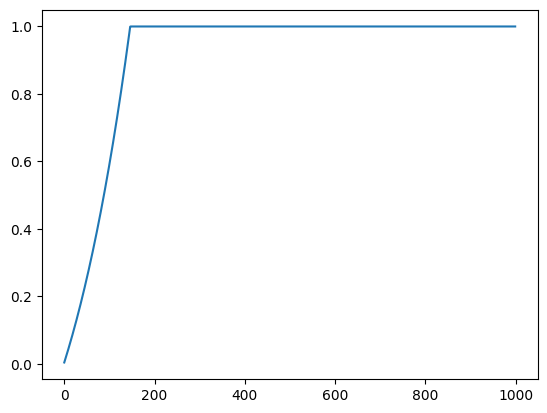

In [22]:
plot_snr_weight(gamma=5, v_pred=False)

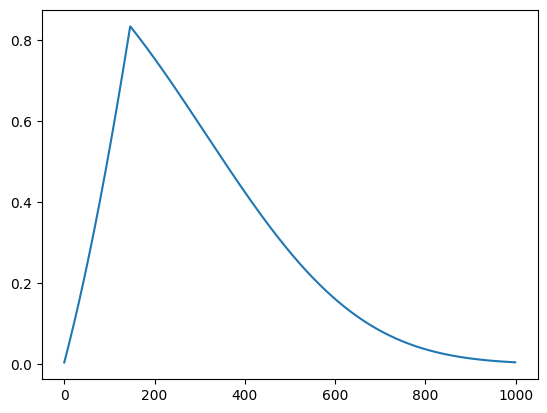

In [23]:
plot_snr_weight(gamma=5, v_pred=True)

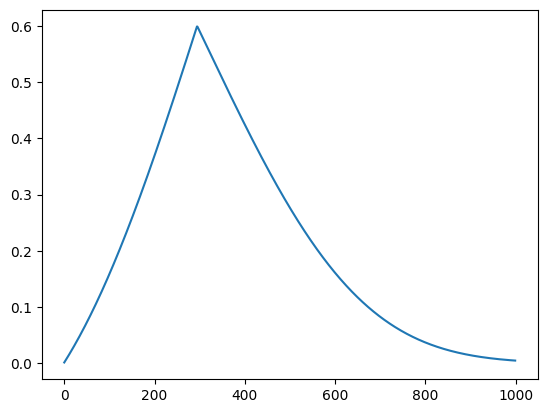

In [25]:
# v-pred, gamma=5
plot_snr_weight(gamma=1.5, v_pred=True)